### LSTM-based Recurrent Neural Network (RNN) to predict SBIN (State Bank of India) stock price

In [1]:
### Importing Required Libraries ###

import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime

import matplotlib.pyplot as plt

import numpy as np

from sklearn.preprocessing import MinMaxScaler

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout

In [3]:
#read the file
df = pd.read_csv(r"C:\Users\sanja\Desktop\DATA SCIENCE\sem 3\Mini project-AAI\BRITANNIA.csv")

#print the head
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BRITANNIA,EQ,703.25,705.0,759.50,705.0,758.0,756.90,741.01,7512,5.566488e+11,NaN,NaN,NaN
1,2000-01-04,BRITANNIA,EQ,756.90,710.0,770.00,710.0,740.0,754.55,742.52,8135,6.040391e+11,NaN,NaN,NaN
2,2000-01-05,BRITANNIA,EQ,754.55,755.0,759.00,705.0,740.0,735.30,739.92,6095,4.509784e+11,NaN,NaN,NaN
3,2000-01-06,BRITANNIA,EQ,735.30,740.0,794.15,740.0,770.0,785.65,788.83,19697,1.553756e+12,NaN,NaN,NaN
4,2000-01-07,BRITANNIA,EQ,785.65,808.0,848.50,798.0,848.5,848.50,827.53,33107,2.739708e+12,NaN,NaN,NaN


Setting Date as Index. We will use **Close** Price for prediction

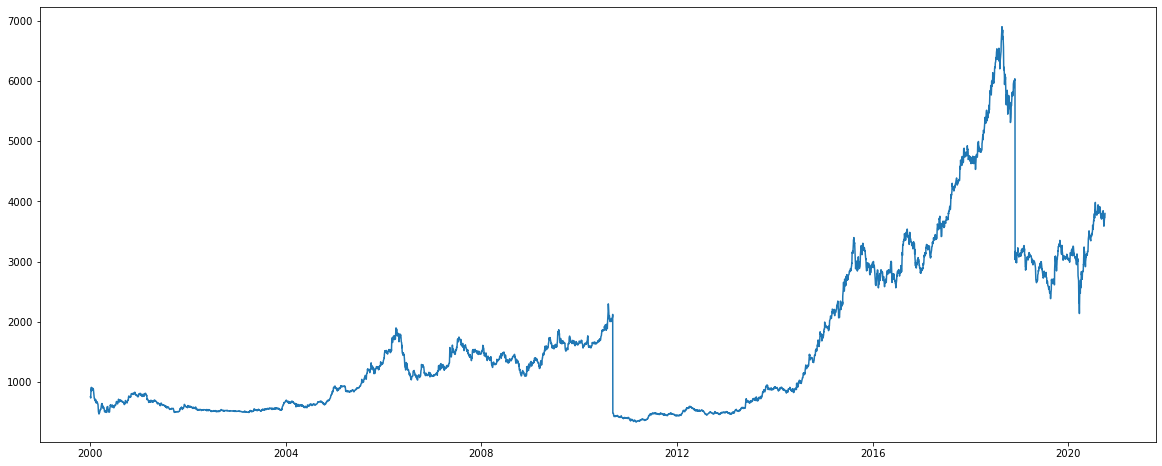

In [4]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(20,8))
plt.plot(df['Close'], label='Historical Close Price')

Selecting Close Price as feature and removing other columns from the data

In [5]:
features = ["Date", "Close"]
all_data = df[features]

In [6]:
#setting index
all_data.index = all_data.Date
all_data.drop('Date', axis=1, inplace=True)

C:\Users\sanja\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
all_data.head()

,Close
Date,
2000-01-03,756.90
2000-01-04,754.55
2000-01-05,735.30
2000-01-06,785.65
2000-01-07,848.50


In [8]:
all_data.shape

(5162, 1)

In [9]:
#creating training and validation sets
dataset = all_data.values

train = dataset[2000:4500,:]
valid = dataset[4500:,:]

### Feature Scaling

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

### Creating Sliding Window of 90 days

This data structure is needed to cover 90-days close price stamps, based on which RNN will predict the 91st day's close price. 

In [11]:
x_train, y_train = [], []
for i in range(90,len(train)):
    x_train.append(scaled_data[i-90:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

#### Data Reshaping 

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

### Model Building

Initializing the LSTM model and 2nd, 3rd and 4th LSTM layer each with a Dropout Layer. The layers contain 50 neurons and with a Dropout rate of 20%, twenty percent of 50 neurons will be ignored randomly during each iteration

Finally, an output layer is added with 1 as an output dimension (as we are predicting the close price)

In [13]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units=50, return_sequences = False))
model.add(Dropout(rate = 0.2))

model.add(Dense(1))

Compiling the model with **Stochastic Gradient Descent** algorithm 

Using Mean Squared Error as Loss Function

In [14]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [32]:
len(y_train)

2410

In [26]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
38/38 [==============================] - 10s 275ms/step - loss: 6.1015e-05
Epoch 2/100
38/38 [==============================] - 10s 272ms/step - loss: 6.0558e-05
Epoch 3/100
38/38 [==============================] - 10s 274ms/step - loss: 5.8043e-05
Epoch 4/100
38/38 [==============================] - 10s 273ms/step - loss: 5.6491e-05
Epoch 5/100
38/38 [==============================] - 10s 274ms/step - loss: 5.7388e-05
Epoch 6/100
38/38 [==============================] - 10s 275ms/step - loss: 6.3669e-05
Epoch 7/100
38/38 [==============================] - 10s 273ms/step - loss: 5.7763e-05
Epoch 8/100
38/38 [==============================] - 10s 273ms/step - loss: 5.6910e-05
Epoch 9/100
38/38 [==============================] - 10s 274ms/step - loss: 6.1095e-05
Epoch 10/100
38/38 [==============================] - 10s 276ms/step - loss: 5.5620e-05
Epoch 11/100
38/38 [==============================] - 11s 277ms/step - loss: 6.0579e-05
Epoch 12/100
38/38 [=====================

38/38 [==============================] - 10s 275ms/step - loss: 4.4998e-05
Epoch 95/100
38/38 [==============================] - 11s 279ms/step - loss: 4.6175e-05
Epoch 96/100
38/38 [==============================] - 11s 279ms/step - loss: 4.7945e-05
Epoch 97/100
38/38 [==============================] - 10s 273ms/step - loss: 4.8235e-05
Epoch 98/100
38/38 [==============================] - 10s 275ms/step - loss: 4.6793e-05
Epoch 99/100
38/38 [==============================] - 10s 272ms/step - loss: 4.5917e-05
Epoch 100/100
38/38 [==============================] - 10s 270ms/step - loss: 4.8120e-05


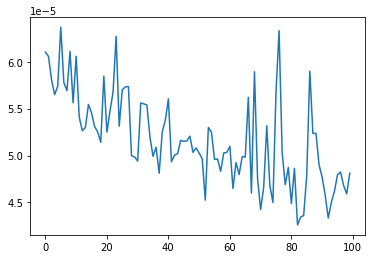

In [27]:
plt.plot(hist.history['loss'])

### Preparing the Test data for prediction

In [16]:
#predicting test data values, using past 90 from the train data
inputs = all_data[len(all_data) - len(valid)-90:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [17]:
inputs.shape

(752, 1)

In [18]:
X_test = []
for i in range(90,inputs.shape[0]):
    X_test.append(inputs[i-90:i,0])
X_test = np.array(X_test)

In [19]:
X_test

array([[0.61734056, 0.61456016, 0.61164265, ..., 0.66592523, 0.67035863,
        0.6677382 ],
       [0.61456016, 0.61164265, 0.6081462 , ..., 0.67035863, 0.6677382 ,
        0.65347055],
       [0.61164265, 0.6081462 , 0.59934032, ..., 0.6677382 , 0.65347055,
        0.66360188],
       ...,
       [0.43126695, 0.43077181, 0.43937201, ..., 0.50101313, 0.49916207,
        0.51038271],
       [0.43077181, 0.43937201, 0.45505652, ..., 0.49916207, 0.51038271,
        0.51814498],
       [0.43937201, 0.45505652, 0.46352723, ..., 0.51038271, 0.51814498,
        0.5180688 ]])

In [20]:
X_test.shape

(662, 90)

In [21]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
preds = model.predict(X_test)
preds = scaler.inverse_transform(preds)

In [22]:
preds

array([[4413.4517],
       [4409.3184],
       [4397.926 ],
       [4393.4346],
       [4392.693 ],
       [4404.9463],
       [4421.3687],
       [4410.243 ],
       [4359.4326],
       [4299.771 ],
       [4274.1797],
       [4288.868 ],
       [4352.8726],
       [4431.583 ],
       [4487.834 ],
       [4512.477 ],
       [4499.0195],
       [4463.7695],
       [4435.404 ],
       [4443.2744],
       [4500.942 ],
       [4577.952 ],
       [4636.196 ],
       [4668.4995],
       [4664.713 ],
       [4628.401 ],
       [4566.148 ],
       [4518.8066],
       [4495.395 ],
       [4493.2554],
       [4510.23  ],
       [4535.7197],
       [4547.723 ],
       [4552.744 ],
       [4552.314 ],
       [4538.3677],
       [4519.0527],
       [4505.2314],
       [4501.344 ],
       [4505.573 ],
       [4517.1436],
       [4553.2856],
       [4600.635 ],
       [4668.141 ],
       [4730.484 ],
       [4748.932 ],
       [4736.0293],
       [4735.5137],
       [4748.98  ],
       [4760.    ],


### Calculating the RMSE to evaluate the model performance

In [24]:
rms=np.sqrt(np.mean(np.power((valid-preds),2)))
rms

331.05597976834156

### Plotting the output

<ipython-input-25-9109d7d841f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


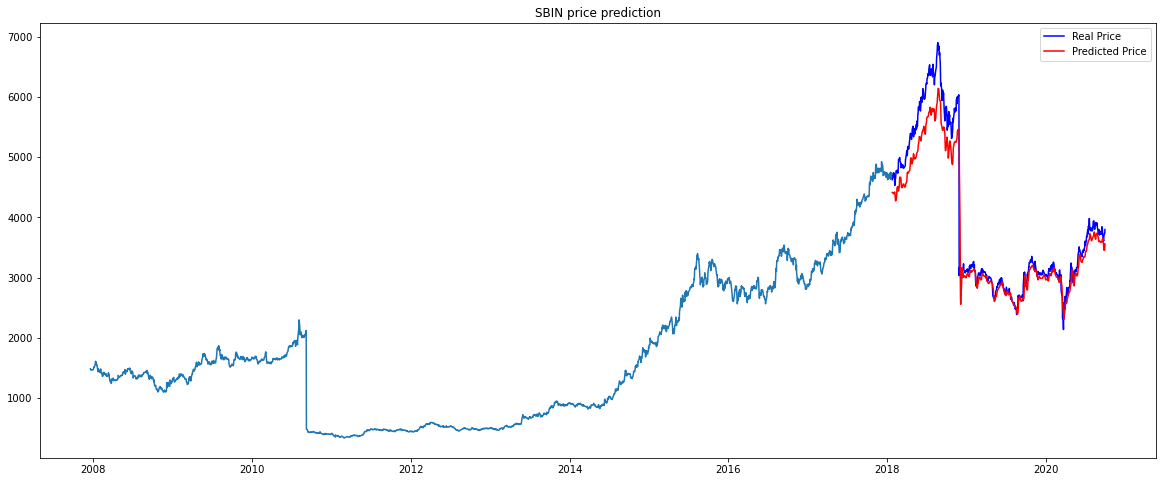

In [25]:
#for plotting
train = all_data[2000:4500]
valid = all_data[4500:]
valid['Predictions'] = preds
plt.figure(figsize=(20,8))
plt.plot(train['Close'])
plt.plot(valid['Close'], color = 'blue', label = 'Real Price')
plt.plot(valid['Predictions'], color = 'red', label = 'Predicted Price')
plt.title('SBIN price prediction')
plt.legend()
plt.show()